> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - TMBD-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project we will analyzing data that has been collected from about 10,000 movies using the TMDb (The Movie Database). 
This data includes the id, IMBD id, the popularity of the movie, its budget, revenue, original title, cast, the homepage of the movie, its director, its tagline, keywords used for it (ex: For Jurassic World some keywords are monster, DNA, and island), the movie overview, its runtime, genre, production companies, the release date, vote count, vote average, release year, adjusted budget, and adjusted revenue. Each of these categories are very important for learning about how the movie did and it can give some insight on why it did so well or so poorly. For example, the columns giving the id, IMBD id, and original title are identifiers so people can find the movie they are looking for or so they can know what movie information they are looking at. Columns like cast, homepage, director, tagline, keywords, movie overview, runtime, genre, production companies and production companies are ways to learn about the movie its self, who helped make it and what is that movie about. While the columns budget, release date, release year, and adjusted budget are more details about the movie that the main population of people may not want or need to know about. Then the columns popularity, revenue, vote count, vote average, and adjusted revenue can help show you how successful the movie w


### Question(s) for Analysis
1. Is the film industry making a profit over the years?
2. Is the rating of movies getting better or worse? 

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [6]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [7]:
db = pd.read_csv('tmdb-movies.csv')
db.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
Crop columns, drop duplicity, if there is any
Change the lease date to date time
Drop null or 0 values from the data
 

In [9]:
# Deleting (id,imdb_id,cast,homepage,tagline,keywords,overview) columns
to_drop = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]

In [10]:
db.drop(to_drop, inplace=True, axis=1)

In [11]:
# Check for duplicates in the data
sum(db.duplicated())

1

In [12]:
# Drop duplicates
db.drop_duplicates(inplace=True)

In [13]:
# Check again for duplicates 
sum(db.duplicated())

0

In [14]:
db.isnull

<bound method DataFrame.isnull of        popularity     budget     revenue                original_title  \
0       32.985763  150000000  1513528810                Jurassic World   
1       28.419936  150000000   378436354            Mad Max: Fury Road   
2       13.112507  110000000   295238201                     Insurgent   
3       11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4        9.335014  190000000  1506249360                     Furious 7   
...           ...        ...         ...                           ...   
10861    0.080598          0           0            The Endless Summer   
10862    0.065543          0           0                    Grand Prix   
10863    0.065141          0           0           Beregis Avtomobilya   
10864    0.064317          0           0        What's Up, Tiger Lily?   
10865    0.035919      19000           0      Manos: The Hands of Fate   

                 director  runtime                                     genres

In [15]:
# Convert 'release_date' type from str to datetime 
db["release_date"] = pd.to_datetime(db["release_date"])

In [16]:
# Replace all values of 0 with NAN
db = db.replace(0, np.nan)

In [17]:
# Droping the null
df = db.dropna()

In [19]:
# Confirm correction 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3807 non-null float64
budget                  3807 non-null float64
revenue                 3807 non-null float64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null float64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
budget_adj              3807 non-null float64
revenue_adj             3807 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 446.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1: Has the film industry making a profit over the years?
We will work with two variables, The independent varible is the time in release_year column and the dependent varible is the number of movies.
First we need to calculate the number of movies in each year by value_counts() release_years column, and sort the years by sort_index().
Now we want visualize the result to make conclusion.

In [20]:
# count the number of movies in each year then sort the result
count_movies_year = db["release_year"].value_counts().sort_index()

Text(0,0.5,'Year')

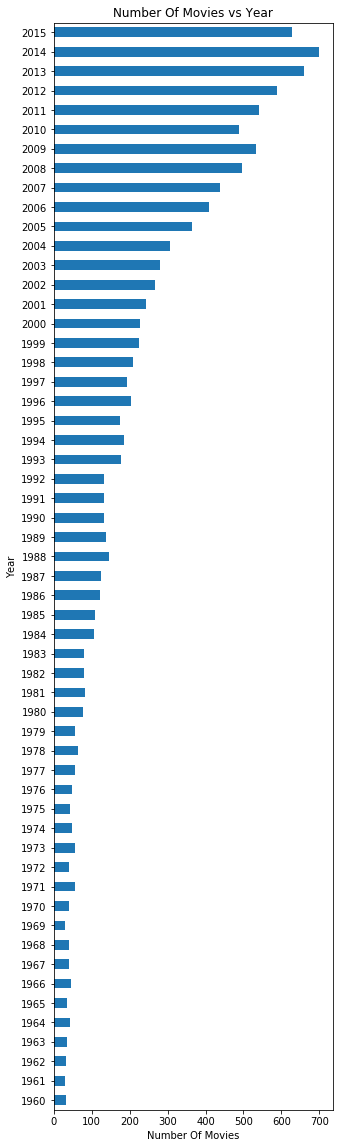

In [21]:
# plot relationship between release_year and number of movies
count_movies_year.plot(kind='barh',title='Number Of Movies vs Year', figsize=(5,20))
# x-axis name
plt.xlabel('Number Of Movies')
# y-axis name
plt.ylabel('Year')

### Research Question 2  2. Is the public rating of movies getting better or worse?
Independent variable is release year
Dependent variable is vote average
Group by to ttable by year and calculate the mean of the average for each year
First we define a function to calculate the mean of one column then groupby the result by another column, We will use this function in Q1 & Q2.


In [22]:
# definding a function to calculate the mean for column2 and groupby by column1
def groupby_avg(column1,column2):
    avg_gb_data = db.groupby(column1)[column2].mean()
    return avg_gb_data

In [23]:
#Now we want visualize the result to make conclusion.


In [24]:
# call the groupby_avg function and passing release_year and vote_average arguments
avg_rating_year = groupby_avg("release_year","vote_average")

ModuleNotFoundError: No module named 'pandas.plotting._timeseries'

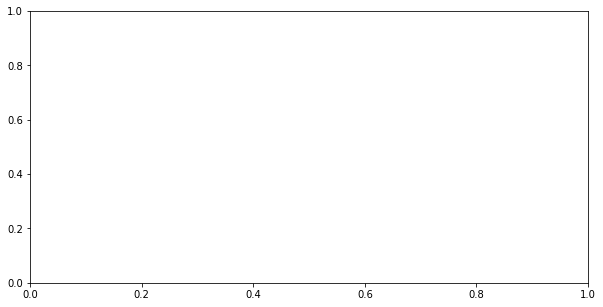

In [30]:
# plot relationship between release_year and vote_average
avg_rating_year.plot(kind='line',title='Average Rating VS Years',figsize = (10,5))

In [35]:
### Research Question 2  2. Is the public rating of movies getting better or worse?
Independent variable is release year
Dependent variable is vote average
Group by to ttable by year and calculate the mean of the average for each year
First we define a function to calculate the mean of one column then groupby the result by another column, We will use this function in Q1 & Q2.


SyntaxError: invalid syntax (<ipython-input-35-26eb1486a66e>, line 2)

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])